In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("raw/time_series_60min_singleindex.csv")
data

,utc_timestamp,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
0,2014-12-31T23:00:00Z,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01T00:00:00Z,2015-01-01T01:00:00+0100,5946.0,6701.0,35.0,NaN,69.0,9484.0,9897.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01T01:00:00Z,2015-01-01T02:00:00+0100,5726.0,6593.0,45.0,NaN,64.0,9152.0,9521.0,NaN,...,1045.47,816.0,NaN,1.17,2728.0,2860.0,3.8,NaN,NaN,NaN
3,2015-01-01T02:00:00Z,2015-01-01T03:00:00+0100,5347.0,6482.0,41.0,NaN,65.0,8799.0,9135.0,NaN,...,1004.79,805.0,NaN,1.04,2626.0,2810.0,3.8,NaN,NaN,NaN
4,2015-01-01T03:00:00Z,2015-01-01T04:00:00+0100,5249.0,6454.0,38.0,NaN,64.0,8567.0,8909.0,NaN,...,983.79,803.0,NaN,1.61,2618.0,2780.0,3.8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50396,2020-09-30T19:00:00Z,2020-09-30T21:00:00+0200,6661.0,6656.0,NaN,NaN,1847.0,9402.0,9720.0,NaN,...,1506.95,1530.0,5.32,0.44,3324.0,3170.0,1.7,1.1,NaN,NaN
50397,2020-09-30T20:00:00Z,2020-09-30T22:00:00+0200,6336.0,6310.0,NaN,NaN,1723.0,9219.0,9418.0,NaN,...,1391.15,1388.0,5.57,0.62,3099.0,3010.0,1.7,1.0,NaN,NaN
50398,2020-09-30T21:00:00Z,2020-09-30T23:00:00+0200,5932.0,5813.0,NaN,NaN,1771.0,8763.0,8873.0,NaN,...,1250.17,1274.0,5.58,0.66,2940.0,2890.0,1.6,1.0,NaN,NaN
50399,2020-09-30T22:00:00Z,2020-10-01T00:00:00+0200,5628.0,5424.0,NaN,NaN,1779.0,8131.0,8285.0,NaN,...,1206.82,1178.0,5.61,0.21,2823.0,2740.0,1.7,1.2,NaN,NaN


In [3]:
data = data.iloc[1:] # remove first row
data = data[["utc_timestamp", "AT_load_actual_entsoe_transparency", "AT_price_day_ahead", "AT_solar_generation_actual"]]
data

,utc_timestamp,AT_load_actual_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual
1,2015-01-01T00:00:00Z,5946.0,35.0,NaN
2,2015-01-01T01:00:00Z,5726.0,45.0,NaN
3,2015-01-01T02:00:00Z,5347.0,41.0,NaN
4,2015-01-01T03:00:00Z,5249.0,38.0,NaN
5,2015-01-01T04:00:00Z,5309.0,35.0,NaN
...,...,...,...,...
50396,2020-09-30T19:00:00Z,6661.0,NaN,NaN
50397,2020-09-30T20:00:00Z,6336.0,NaN,NaN
50398,2020-09-30T21:00:00Z,5932.0,NaN,NaN
50399,2020-09-30T22:00:00Z,5628.0,NaN,NaN


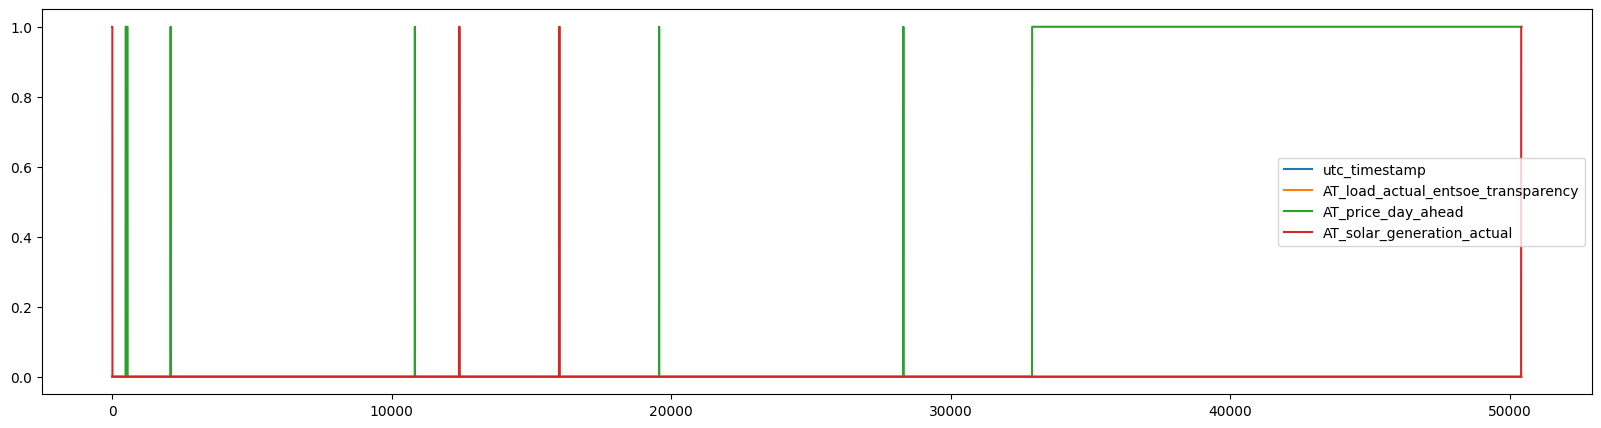

In [4]:
# plot the nan values
plt.figure(figsize=(20, 5))
plt.plot(data.isna())
plt.legend(data.columns)
plt.show()

In [5]:
data = data.iloc[:26280]    # select the first three years (3 * 365 * 24 = 26280)
data["utc_timestamp"] = pd.to_datetime(data["utc_timestamp"], format="%Y-%m-%dT%H:%M:%SZ")
data["date"] = data["utc_timestamp"].dt.date
data["time"] = data["utc_timestamp"].dt.time
data.drop(columns=["utc_timestamp"], inplace=True)
data = data[["date", "time", "AT_load_actual_entsoe_transparency", "AT_price_day_ahead", "AT_solar_generation_actual"]]
data

/tmp/ipykernel_154687/414307045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["utc_timestamp"] = pd.to_datetime(data["utc_timestamp"], format="%Y-%m-%dT%H:%M:%SZ")
/tmp/ipykernel_154687/414307045.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["date"] = data["utc_timestamp"].dt.date
/tmp/ipykernel_154687/414307045.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,date,time,AT_load_actual_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual
1,2015-01-01,00:00:00,5946.0,35.0,NaN
2,2015-01-01,01:00:00,5726.0,45.0,NaN
3,2015-01-01,02:00:00,5347.0,41.0,NaN
4,2015-01-01,03:00:00,5249.0,38.0,NaN
5,2015-01-01,04:00:00,5309.0,35.0,NaN
...,...,...,...,...,...
26276,2017-12-30,19:00:00,7313.0,7.0,0.0
26277,2017-12-30,20:00:00,6841.0,2.0,0.0
26278,2017-12-30,21:00:00,6820.0,1.0,0.0
26279,2017-12-30,22:00:00,6324.0,-7.0,0.0


In [6]:
# calculate the mean for each time and fill nan values
time_mean = data.drop(["date"], axis=1).groupby("time").mean()
time_mean

,AT_load_actual_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual
time,,,
00:00:00,5614.347032,23.071363,0.000000
01:00:00,5475.142466,22.112637,0.000000
02:00:00,5469.416438,22.046789,0.000000
03:00:00,5775.212785,23.422936,0.760989
04:00:00,6441.724201,27.676121,10.046703
05:00:00,7187.010959,33.473010,43.041209
06:00:00,7710.515068,38.022873,97.976190
07:00:00,7901.564384,37.998170,168.669716
08:00:00,8009.636530,36.335773,243.627630


In [7]:
def fillna_with_time_mean(row):
    row.fillna(time_mean.loc[row["time"]], inplace=True)
    return row

data = data.apply(fillna_with_time_mean, axis=1)
data

,date,time,AT_load_actual_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual
1,2015-01-01,00:00:00,5946.0,35.0,0.000000
2,2015-01-01,01:00:00,5726.0,45.0,0.000000
3,2015-01-01,02:00:00,5347.0,41.0,0.000000
4,2015-01-01,03:00:00,5249.0,38.0,0.760989
5,2015-01-01,04:00:00,5309.0,35.0,10.046703
...,...,...,...,...,...
26276,2017-12-30,19:00:00,7313.0,7.0,0.000000
26277,2017-12-30,20:00:00,6841.0,2.0,0.000000
26278,2017-12-30,21:00:00,6820.0,1.0,0.000000
26279,2017-12-30,22:00:00,6324.0,-7.0,0.000000


In [8]:
# divide AT_load_actual_entsoe_transparency by 100
data["AT_load_actual_entsoe_transparency"] /= 100
data

,date,time,AT_load_actual_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual
1,2015-01-01,00:00:00,59.46,55.5,0.000000
2,2015-01-01,01:00:00,57.26,60.5,0.000000
3,2015-01-01,02:00:00,53.47,58.5,0.000000
4,2015-01-01,03:00:00,52.49,57.0,0.760989
5,2015-01-01,04:00:00,53.09,55.5,10.046703
...,...,...,...,...,...
26276,2017-12-30,19:00:00,73.13,41.5,0.000000
26277,2017-12-30,20:00:00,68.41,39.0,0.000000
26278,2017-12-30,21:00:00,68.20,38.5,0.000000
26279,2017-12-30,22:00:00,63.24,34.5,0.000000


In [9]:
# remove date and time columns
data.drop(columns=["date", "time"], inplace=True)
# rename columns
data.columns = ["load", "price", "solar"]
# split the first two years for training and the last year for testing
train_data = data.iloc[:17520]
test_data = data.iloc[17520:]
train_data

,load,price,solar
1,59.46,55.5,0.000000
2,57.26,60.5,0.000000
3,53.47,58.5,0.000000
4,52.49,57.0,0.760989
5,53.09,55.5,10.046703
...,...,...,...
17516,77.57,59.5,0.000000
17517,72.23,57.0,0.000000
17518,72.35,56.0,0.000000
17519,68.06,54.5,0.000000


In [10]:
# save the data
train_data.to_csv("preprocessed/train.csv", index=False)
test_data.to_csv("preprocessed/test.csv", index=False)